<a href="https://colab.research.google.com/github/ImmarGaneru/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Praktikum



#1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan

Mounted at /content/drive
   Gamma Correction pada citra   
----------------------------------
Masukkan nilai Gamma: 3


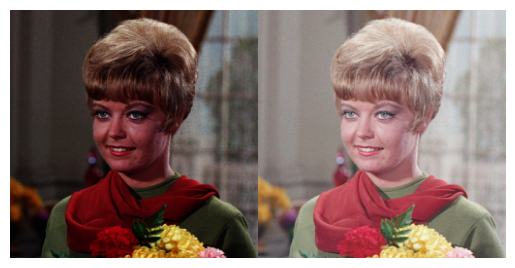

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

def gamma_correction(image, gamma):
    inv_gamma = 1 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

image = cv.imread('/content/drive/MyDrive/Images/female.tiff')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
print('   Gamma Correction pada citra   ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

gamma_corrected = gamma_correction(image, gamma)

final_frame = cv.hconcat([image, gamma_corrected])
plt.imshow(final_frame)
plt.axis('off')
plt.show()

##2. Buat Simulasi Image Depth

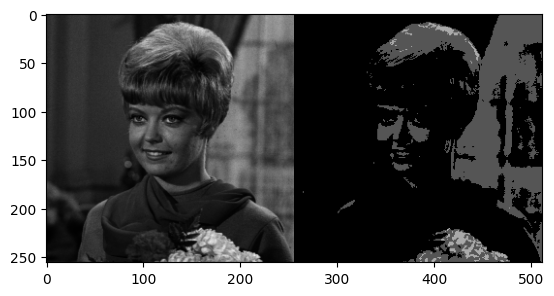

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

depth_image = ((original // level)) * level

original = cv.cvtColor(original, cv.COLOR_GRAY2RGB)
depth_image = cv.cvtColor(depth_image.astype(np.uint8), cv.COLOR_GRAY2BGR)

final_frame = cv.hconcat([original, depth_image])
plt.imshow(final_frame)
plt.show()

##3. Buat modul Average Denoising

In [ ]:
from math import log10, sqrt
def PSNR(original, noisy):
    mse = np.mean((original - noisy) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
galaxy = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

Masukkan jumlah citra: 100
PSNR value is 27.51911573292884 dB


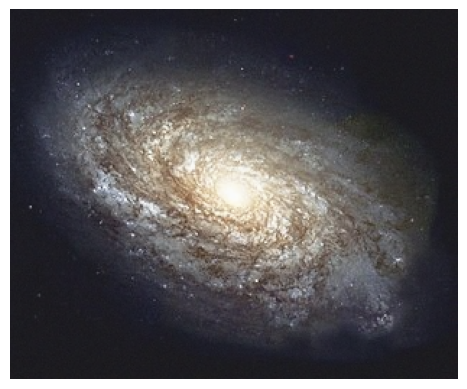

In [ ]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape, dtype=np.float32)

jmlCitra = int(input('Masukkan jumlah citra: '))
for i in range(jmlCitra):
  denoised_img += cv_img[i]

denoised_img = denoised_img / jmlCitra
denoised_img = np.uint8(denoised_img)
denoised_img = cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB)

psnr = PSNR(galaxy, denoised_img)

print(f'PSNR value is {psnr} dB')
plt.imshow(denoised_img)
plt.axis('off')
plt.show()

##4. Buat image masking

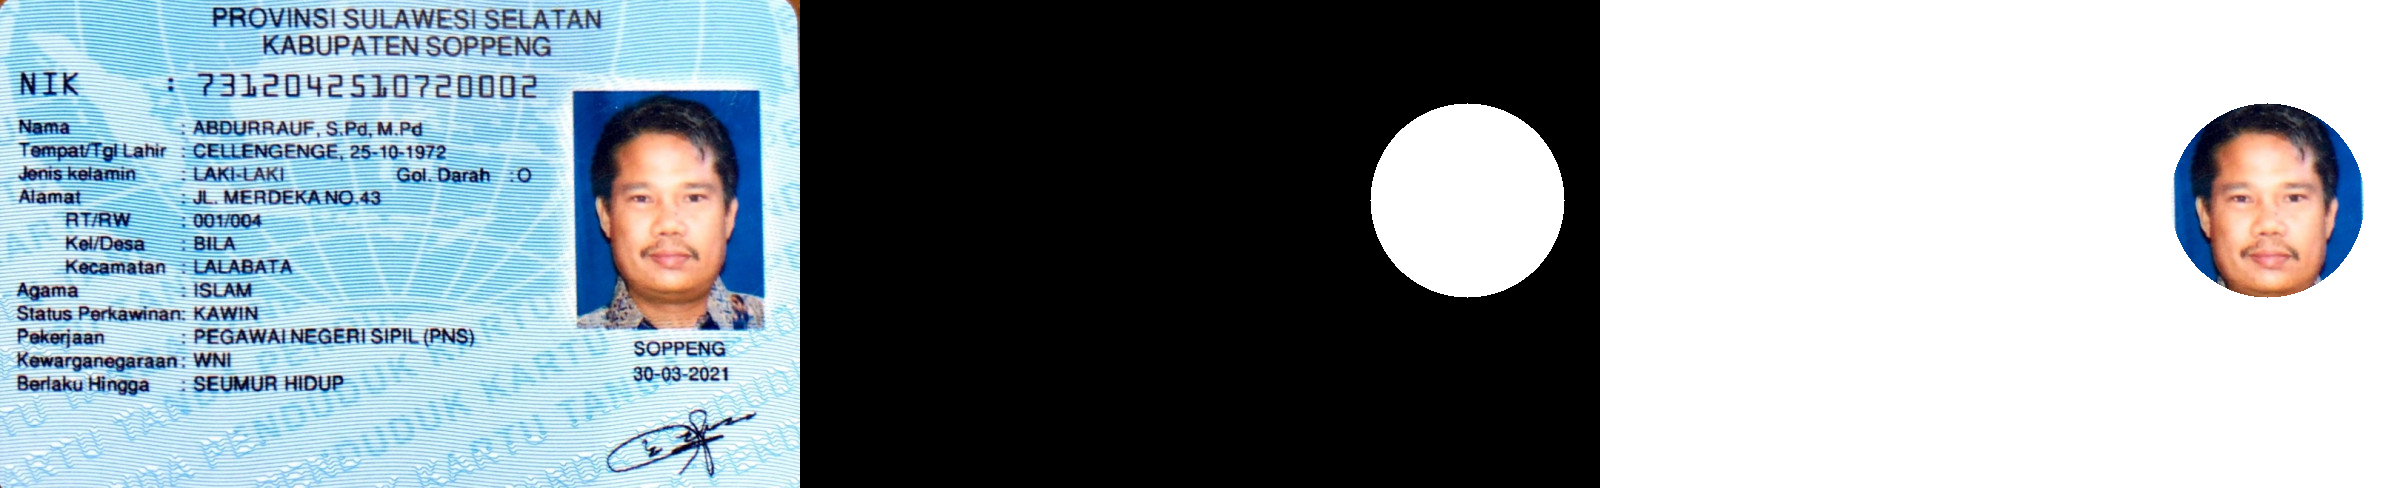

In [ ]:
from google.colab.patches import cv2_imshow

ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/KTP7.jpeg')

height, width = ktp.shape[:2]

mask = np.zeros((height, width), dtype=np.uint8)

radius = min(width, height) // 5

cv.circle(mask, (667, 200), radius, 255, -1)

mask = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
white = np.ones_like(ktp) * 255

masked_ktp = np.where(mask == 255, ktp, white)

cv2_imshow(cv.hconcat([ktp, mask, masked_ktp]))

##5. Penggunaan operator lain

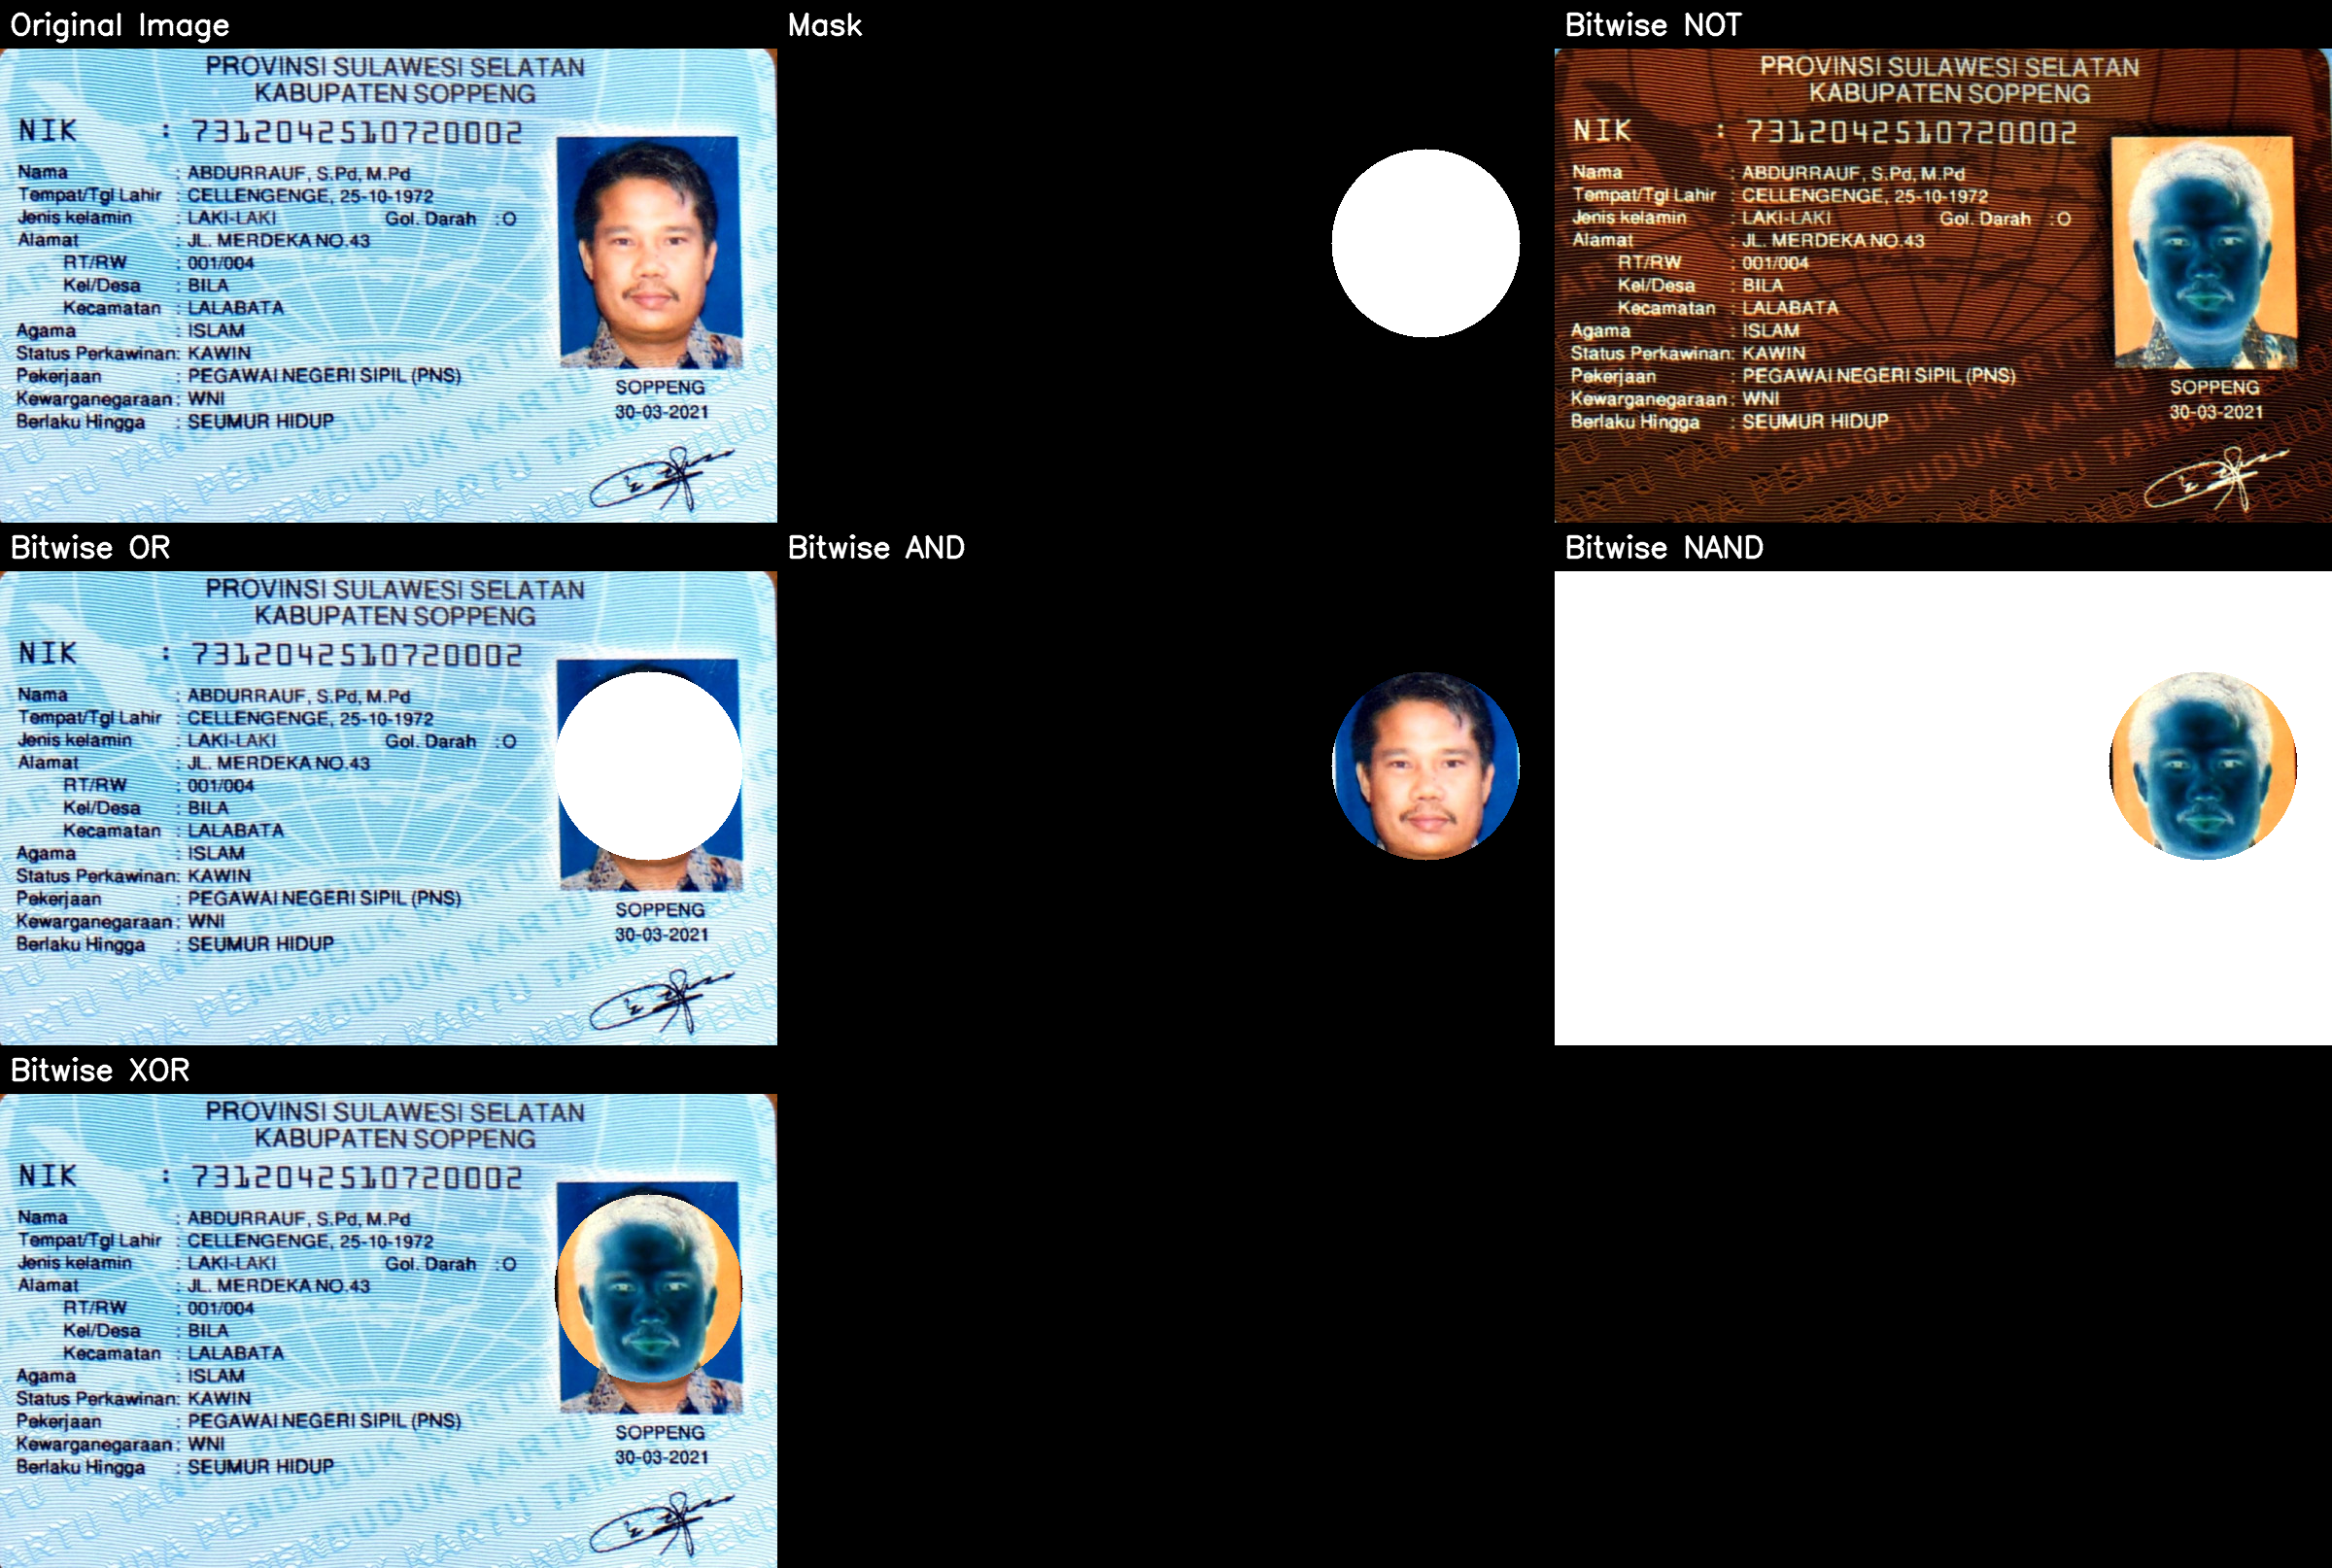

In [ ]:
#NOT
not_img = cv.bitwise_not(ktp)

#OR
or_img = cv.bitwise_or(ktp, mask)

#AND
and_img = cv.bitwise_and(ktp, mask)

#NAND
nand_img = cv.bitwise_not(cv.bitwise_and(ktp, mask))

#XOR
xor_img = cv.bitwise_xor(ktp, mask)

# Menambah teks di atas gambar
def add_text(img, text):
    # Buat area di atas gambar untuk teks
    font = cv.FONT_HERSHEY_SIMPLEX
    scale = 1
    thickness = 2
    color = (255, 255, 255)  # Warna putih untuk teks
    img_with_text = cv.copyMakeBorder(img, 50, 0, 0, 0, cv.BORDER_CONSTANT, value=(0, 0, 0))  # Tambahkan padding di atas gambar
    cv.putText(img_with_text, text, (10, 35), font, scale, color, thickness, cv.LINE_AA)
    return img_with_text

# Menambahkan teks di atas setiap gambar
ktp_text = add_text(ktp, 'Original Image')
mask_text = add_text(mask, 'Mask')
not_img_text = add_text(not_img, 'Bitwise NOT')
or_img_text = add_text(or_img, 'Bitwise OR')
and_img_text = add_text(and_img, 'Bitwise AND')
nand_img_text = add_text(nand_img, 'Bitwise NAND')
xor_img_text = add_text(xor_img, 'Bitwise XOR')

# Menggabungkan semua gambar secara vertikal
row1 = cv.hconcat([ktp_text, mask_text, not_img_text])   # Baris pertama: gambar asli, mask, dan NOT
row2 = cv.hconcat([or_img_text, and_img_text, nand_img_text]) # Baris kedua: OR, AND, dan NAND
row3 = cv.hconcat([xor_img_text, np.zeros_like(ktp_text), np.zeros_like(ktp_text)]) # Baris ketiga: XOR

# Menggabungkan semua baris menjadi satu tampilan
final_display = cv.vconcat([row1, row2, row3])

# Menampilkan semua hasil
cv2_imshow(final_display)